# Knapsack problem

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/1200px-Knapsack.svg.png)

[(4, 12), (2, 2)]


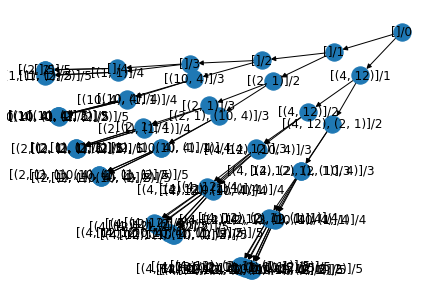

Nodes: 62


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def visit(b):
    return sum(i[0] for i in b), sum(i[1] for i in b)

def depth_search(loot, bag, depth, limit):
    global G, best
    if depth == len(loot):
        w, c = visit(bag)
        wb, cb = visit(best)
        if c > cb and w <= limit:
            best = list(bag)
    else:
        # visualization part
        parent = str((bag)) + '/' + str(depth)
        child1 = str((bag)) + '/' + str(depth+1)
        G.add_edge(parent, child1)
        
        depth_search(loot, bag, depth + 1, limit)
        
        # visualization part
        bag = bag + [loot[depth]]
        child2 = str((bag)) + '/' + str(depth+1)
        G.add_edge(parent, child2)

        depth_search(loot, bag, depth + 1, limit)

best = []
loot = [
    (4, 12),    # $, w
    (2, 1),     # $, w
    (10, 4),
    (1, 1),
    (2, 2),
]

G = nx.DiGraph()
depth_search(loot, [], 0, 6)
print(best)

layout = nx.kamada_kawai_layout(G)
nx.draw(G, layout, with_labels=True)
plt.show()
print("Nodes:", G.size())

## Branch and bound

![](https://media.geeksforgeeks.org/wp-content/uploads/knapsack3.jpg)


[(4, 12), (2, 2)]


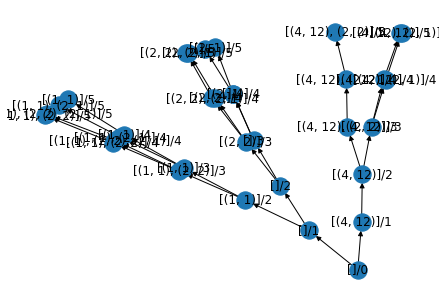

Nodes: 33


In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def visit(b):
    return sum(i[0] for i in b), sum(i[1] for i in b)

def depth_search(loot, bag, depth, limit):
    global G, best
    if depth == len(loot):
        w, c = visit(bag)
        wb, cb = visit(best)
        if c > cb and w <= limit:
            best = list(bag)
    else:
        # visualization part
        parent = str((bag)) + '/' + str(depth)
        child1 = str((bag)) + '/' + str(depth+1)
        G.add_edge(parent, child1)
        
        depth_search(loot, bag, depth + 1, limit)

        bag = bag + [loot[depth]]
        
        # optimization 1
        w, c = visit(bag)
        if w > limit:
            return
        # optimization 2: branch-and-bound, require sorted loot
        if c + (limit - w) / bag[-1][0] * bag[-1][1] <= visit(best)[1]:
            return

        # visualization part
        child2 = str((bag)) + '/' + str(depth+1)
        G.add_edge(parent, child2)

        depth_search(loot, bag, depth + 1, limit)

best = []
loot = [
    (4, 12),    # $, w
    (2, 1),     # $, w
    (10, 4),
    (1, 1),
    (2, 2),
]
loot.sort(key=lambda p: p[0] / p[1])

G = nx.DiGraph()
depth_search(loot, [], 0, 6)
print(best)

layout = nx.kamada_kawai_layout(G)
nx.draw(G, layout, with_labels=True)
plt.show()
print("Nodes:", G.size())